In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    result1: int
    result2: int

In [10]:
def add_numbers_1(state: AgentState) -> AgentState:
    """This function adds two numbers."""
    state['result1'] = state['number1'] + state['number2']
    return state

def subtract_numbers_1(state: AgentState) -> AgentState:
    """This function subtracts two numbers."""
    state['result1'] = state['number1'] - state['number2']
    return state

def decide_next_node_1(state: AgentState) -> str:
    """Decides the next operation based on the 'operation' field."""
    if state['operation1'] == '+':
        return 'add'
    elif state['operation1'] == '-':
        return 'subtract'
    else:
        raise ValueError("Invalid operation. Choose '+' or '-'.")
    
def add_numbers_2(state: AgentState) -> AgentState:
    """This function adds two numbers."""
    state['result2'] = state['number3'] + state['number4']
    return state

def subtract_numbers_2(state: AgentState) -> AgentState:
    """This function subtracts two numbers."""
    state['result2'] = state['number3'] - state['number4']
    return state

def decide_next_node_2(state: AgentState) -> str:
    """Decides the next operation based on the 'operation' field."""
    if state['operation2'] == '+':
        return 'add'
    elif state['operation2'] == '-':
        return 'subtract'
    else:
        raise ValueError("Invalid operation. Choose '+' or '-'.")

In [11]:
graph = StateGraph(AgentState)

graph.add_node("add_nodes_1", add_numbers_1)
graph.add_node("subtract_nodes_1", subtract_numbers_1)
graph.add_node("router_1", lambda state: state)
graph.add_node("add_nodes_2", add_numbers_2)
graph.add_node("subtract_nodes_2", subtract_numbers_2)
graph.add_node("router_2", lambda state: state)

graph.add_edge(START, "router_1")
graph.add_conditional_edges(
    "router_1",
    decide_next_node_1,
    {
        "add": "add_nodes_1",
        "subtract": "subtract_nodes_1"
    }
)
graph.add_edge("add_nodes_1", "router_2")
graph.add_edge("subtract_nodes_1", "router_2")
graph.add_conditional_edges(
    "router_2",
    decide_next_node_2,
    {
        "add": "add_nodes_2",
        "subtract": "subtract_nodes_2"
    }
)
graph.add_edge("add_nodes_2", END)
graph.add_edge("subtract_nodes_2", END)

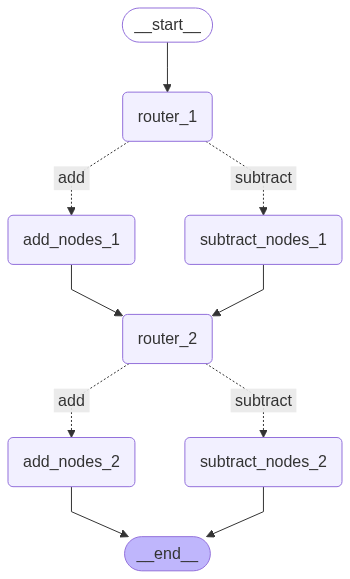

In [12]:
app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
initial_state_1 = AgentState(
    number1=10,
    number2=5,
    number3=20,
    number4=15,
    operation1='+',
    operation2='-'
)

In [14]:
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 5, 'number3': 20, 'number4': 15, 'operation1': '+', 'operation2': '-', 'result1': 15, 'result2': 5}
